In [166]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [167]:
N = 15
DIM = 2

In [168]:
np.random.seed(0)
pts = np.random.random((N,DIM))
pts

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194]])

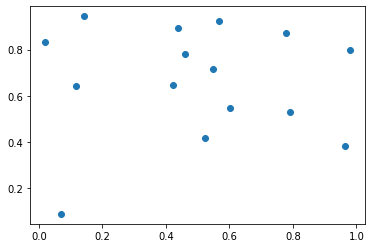

In [169]:
X, Y = pts.T
plt.scatter(X,Y)

In [170]:
def euc_dist(p1, p2):
    return np.sqrt( (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )

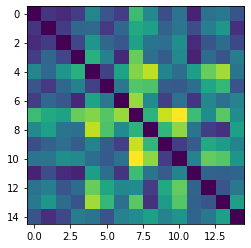

In [171]:

distances = np.zeros((N,N))

for i, p1 in enumerate(pts):
    for j,p2 in enumerate(pts):
        distances[i, j] = euc_dist(p1, p2)

plt.imshow(distances)

In [172]:
sorted_distance_idx = np.zeros((N,N), dtype="int8")

visited = []
for i, p1 in enumerate(pts):
    sorted_distance_idx[i] = np.argsort(distances[i])

sorted_distance_idx

array([[ 0, 11,  2,  1,  3,  6,  9, 14,  5, 12, 10, 13,  4,  8,  7],
       [ 1, 14,  0,  5,  2, 11,  9,  6,  3,  4, 10, 12, 13,  8,  7],
       [ 2, 11,  0,  1,  3, 14, 12,  6,  5, 13,  9,  8, 10,  4,  7],
       [ 3, 11,  6,  0,  2, 13,  9,  1, 12,  8, 14,  5, 10,  4,  7],
       [ 4,  5,  1, 10, 14,  9,  0,  2, 11,  6,  3, 12,  7, 13,  8],
       [ 5,  1,  4, 14,  0, 10,  9,  2, 11,  6,  3, 12, 13,  8,  7],
       [ 6,  3, 11,  0,  9,  2,  1, 13, 10,  5, 14, 12,  8,  4,  7],
       [ 7, 12, 14,  2,  1,  8,  0, 11,  5, 13,  3,  4,  6,  9, 10],
       [ 8, 13, 12,  3, 11,  2,  0,  6,  1, 14,  7,  9,  5, 10,  4],
       [ 9, 10,  6,  0, 11,  3,  5,  1,  2,  4, 14, 13, 12,  8,  7],
       [10,  9,  5,  4,  6,  0,  1, 11,  3,  2, 14, 13, 12,  8,  7],
       [11,  0,  3,  2,  6,  1,  9, 13, 14, 12,  5,  8, 10,  4,  7],
       [12,  8,  2, 13, 11,  3,  0, 14,  1,  6,  7,  5,  9, 10,  4],
       [13,  8,  3, 12, 11,  2,  6,  0,  1,  9, 14,  5, 10,  7,  4],
       [14,  1,  2,  5,  0, 11,  4

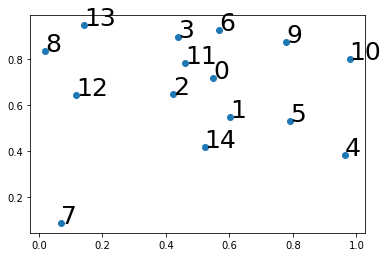

In [173]:
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()

In [174]:
visited = []
start = 7
current = start
while len(visited) != N:
    visited.append(current)
    for pt in sorted_distance_idx[current]:
        if pt not in visited:
            current = pt
            break

print(visited)
    

[7, 12, 8, 13, 3, 11, 0, 2, 1, 14, 5, 4, 10, 9, 6]


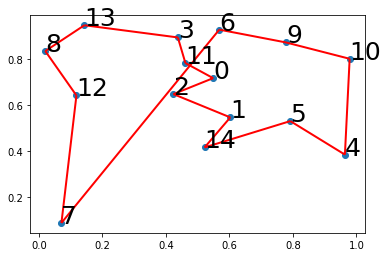

In [175]:
def plotlines(visited):
    pairs=[]
    for i in range(N-1):
        pair = (pts[visited[i]], pts[visited[i+1]])
        pairs.append(pair)
    pairs.append((pts[visited[0]], pts[visited[-1]]))
    return np.array(pairs)


pairs = plotlines(visited)

lc = mc.LineCollection(pairs, color="r", linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.scatter(X,Y)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=25)

plt.show()

In [176]:
tot_dist = 0
for pair in pairs:
    tot_dist += euc_dist(*pair)
tot_dist

4.3002192586310795

In [177]:
def distance(start, sorted_distance_idx):
    visited = []
    current = start
    while len(visited) != N:
        visited.append(current)
        for pt in sorted_distance_idx[current]:
            if pt not in visited:
                current = pt
                break
    pairs=[]
    for i in range(N-1):
        pair = (pts[visited[i]], pts[visited[i+1]])
        pairs.append(pair)
    pairs.append((pts[visited[0]], pts[visited[-1]]))
    pairs = np.array(pairs)
    tot_dist = 0
    for pair in pairs:
        tot_dist += euc_dist(*pair)
    return pairs, tot_dist

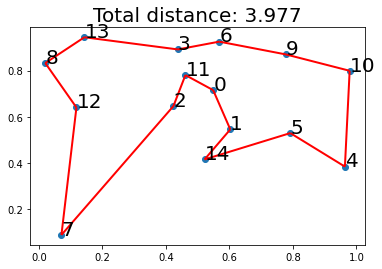

In [184]:
best_start = [np.inf, 0]
for start in range(N):
    dist = distance(start, sorted_distance_idx)[1]
    if dist < best_start[0]:
        best_start[0] = dist
        best_start[1] = start

        
        
pairs = distance(best_start[1], sorted_distance_idx)        

lc = mc.LineCollection(pairs[0], color="r", linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.scatter(X,Y)
plt.title(f"Total distance: {pairs[1]:.3f}", fontsize=20)
for i, pt in enumerate(pts):
    plt.text(pt[0], pt[1], i, fontsize=20)
